In [1]:
%pylab inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Procedure

1. Standardizing the data
2. Constructing the covariance matrix
3. Obtaining the eigenvalues and eigenvectors of the covariance matrix
4. Sorting the eigenvalues by decreasing order to rank the eigenvectors
5. Feature reduction by sorted eigenvalues

# Data

In [2]:
wine = load_wine()

data_x, data_y = wine['data'], wine['target']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, 
                                                    stratify=data_y, random_state=0)

# Standardize the features
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', test_x.shape)
print('test_y:', test_y.shape)

train_x: (124, 13)
train_y: (124,)
test_x: (54, 13)
test_y: (54,)


# Covariance Matrix

cov_mat: (13, 13)
eigen_vals: (13,)
eigen_vecs: (13, 13)


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


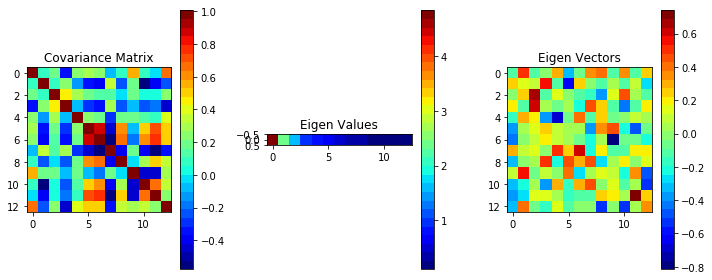

In [95]:
cov_mat = np.cov(train_x.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('cov_mat:', cov_mat.shape)
print('eigen_vals:', eigen_vals.shape)
print('eigen_vecs:', eigen_vecs.shape)

# Visualize
fig, plots = subplots(1, 3, figsize=(10, 4))
fig.set_tight_layout(True)
plots = plots.reshape(-1)

plots[0].set_title('Covariance Matrix')
plots[1].set_title('Eigen Values')
plots[2].set_title('Eigen Vectors')
cax1 = plots[0].imshow(cov_mat, interpolation='nearest', cmap=cm.get_cmap('jet', 30))
cax2 = plots[1].imshow(eigen_vals.reshape(1, -1), interpolation='nearest', cmap=cm.get_cmap('jet', 30))
cax3 = plots[2].imshow(eigen_vecs, interpolation='nearest', cmap=cm.get_cmap('jet', 30))
colorbar(cax1, ax=plots[0])
colorbar(cax2, ax=plots[1])
colorbar(cax3, ax=plots[2])

# Expalined Variance

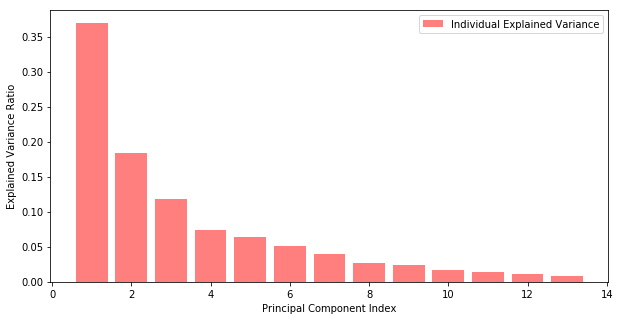

In [139]:
sorted_eigen_vals = sorted(eigen_vals, reverse=True)
var_exp = sorted_eigen_vals/eigen_vals.sum()

plt.figure(figsize=(10, 5))
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', color='red',
        label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
legend()

# Feature Transformation

2 dimensions으로 feature reduction을 한다.

In [220]:
eigen_pairs = list(zip(np.abs(eigen_vals), eigen_vecs))
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

w = np.hstack([eigen_pairs[i][1][:, np.newaxis] for i in range(len(eigen_pairs))])
w = w[:2].T

# Transform Features to lower dimensions
train_x_pca = train_x @ w

print('Projection Matrix:', w.shape)
print('Data X PCA       :', train_x_pca.shape)

Projection Matrix: (13, 2)
Data X PCA       : (124, 2)


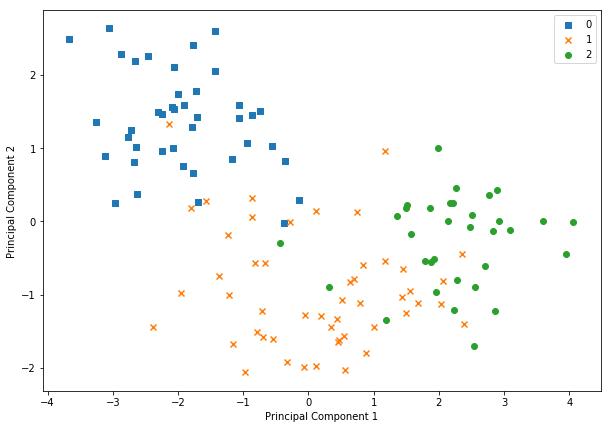

In [223]:
# Visualize
figure(figsize=(10, 7))
markers = ['s', 'x', 'o']

for l, m in zip(np.unique(train_y), markers):
    plt.scatter(train_x_pca[train_y==l, 0], 
                train_x_pca[train_y==l, 1],
                label=l, marker=m)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()